In [4]:
# import library
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver

### trial to get the information inside the restaurant's website

In [4]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36'}
url = 'https://www.zomato.com/boabao'
response= requests.get(url, headers= headers)
response

<Response [200]>


<!DOCTYPE html>

<html>
<head>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://googleads.g.doubleclick.net" rel="preconnect"/>
<link href="https://jumbo.zomato.com" rel="preconnect"/>
<link href="https://accounts.google.com" rel="preconnect"/>
<link href="https://securepubads.g.doubleclick.net" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://www.googleadservices.com" rel="preconnect"/>
<link href="https://bat.bing.com" rel="preconnect"/>
<link href="https://8391443.fls.doubleclick.net" rel="preconnect"/>
<title data-rh="true">Boa-Bao, Chiado, Lisboa | Zomato </title>
<meta charset="utf-8" data-rh="true"><meta content="NOODP,NOYDIR" data-rh="true" name="robots"/><meta content="Boa-Bao Lisboa, Chiado; View reviews, menu, contact, location, and more for Boa-Bao Restaurant." data-rh="true" name="description"/><meta content="summary" data-rh="true" name="twitter:card"/><meta content="Boa-Bao, 
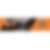
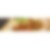
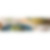
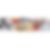
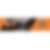
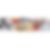
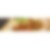
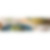

In [5]:
bit_html = response.content
soup = BeautifulSoup(bit_html)
soup

In [6]:
# get the name
result = soup.find_all('h1', attrs={'class': 'sc-7kepeu-0 sc-qrIAp hFDOZp'})
name = result[0].text
name

'Boa-Bao'

In [17]:
# get the ratings
result = soup.find_all('div', attrs={'class': 'sc-1q7bklc-1 cILgox'})
ratings = result[0].text
ratings

'4.7'

In [20]:
# get the number of ratings
result = soup.find_all('div', attrs={'class': 'sc-1q7bklc-8 kEgyiI'})
no_ratings = result[0].text
no_ratings

'4,793'

In [21]:
# get the categories
result = soup.find_all('div', attrs={'class': 'sc-rBLzX euEDKp'})
categories = result[0].text
categories

'Oriental, Tailandesa, Malaia, Filipina, Vietnamita, Coreana, Japonesa, Chinesa'

In [22]:
# get the location
result = soup.find_all('a', attrs={'class': 'sc-iGrrsa dEjBWV'})
location = result[0].text
location

'Chiado, Lisboa'

In [37]:
# get the address
result = soup.find_all('p', attrs={'class': 'sc-1hez2tp-0 clKRrC'})
location = result[0].text
location

'Largo Rafael Bordalo Pinheiro, 30, Chiado, Lisboa 1200-369'

In [38]:
# get the price
result = soup.find_all('p', attrs={'class': re.compile(r'^sc-1hez2tp-0')})
# not possible this way
price = result[10].text
price

'48\xa0€ para duas pessoas (aprox.)'

In [69]:
url = 'https://www.zomato.com/boabao'
driver = webdriver.Chrome(r'D:\IronHack\IH_project3\chromedriver')
driver.get(url)
# the class is not correct, it is empty
zomato = driver.find_elements_by_class_name('sc-1mo3ldo-0 sc-bYTsla dwHMBF')

for info in zomato:
    price = info.find_element_by_xpath('.//*[@id="root"]/div[2]/main/div/section[4]/section/section/article[1]/section[2]/h3[6]').text
    print(price)

# not possible to get the price inside of the restaurant's url

### use selenium to get the restaurant url (trial)

In [45]:
url = 'https://www.zomato.com/grande-lisboa/lisboa-restaurants'
driver = webdriver.Chrome(r'D:\IronHack\IH_project3\chromedriver')
driver.get(url) # url for the infinite page
time.sleep(3)
html = driver.page_source
len(html)

324980

In [48]:
html = driver.page_source
len(html)

1336928

In [ ]:
soup = BeautifulSoup(html)

In [54]:
price_lisbon = soup.find_all('p', attrs={'class': 'sc-1hez2tp-0 sc-eAyhxF fnTSBB'})

In [55]:
url_lisbon =soup.find_all('a', attrs={'class': 'sc-fAJaQT kYdcXo'})

In [77]:
name_lisbon = soup.find_all('h4', attrs={'class': 'sc-1hp8d8a-0'})

In [78]:
# the amount of restaurants
print(len(price_lisbon))
print(len(url_lisbon))
print(len(name_lisbon))

501
501
501


In [57]:
# get the price
price_lisbon[0].text

'45\xa0€ for two'

In [66]:
# get the url
url_lisbon[0].get('href')

'/grande-lisboa/atalho-real-príncipe-real-lisboa/info'

In [ ]:
# put the url in a list 
url_list_lisbon = ['https://www.zomato.com' + url['href'] for url in url_lisbon]
url_list_lisbon

In [ ]:
# put the price in a list
price_list_lisbon = [price.text.replace('\xa0', '').replace('€ for two','') for price in price_lisbon]
price_list_lisbon

In [ ]:
# put the name in a list
name_list_lisbon = [name.text for name in name_lisbon]
name_list_lisbon

In [87]:
# put all the data together 
# put it in a dataframe
list_lisbon = list(zip(name_list_lisbon, url_list_lisbon, price_list_lisbon))
df_lisbon_url = pd.DataFrame(list_lisbon, columns= ['name', 'url', 'price'])

In [88]:
# convert the data to csv 
df_lisbon_url.to_csv('list_lisbon.csv')

### the code to do webscrap for the zomato infinite page, for every location we need

location list:
chiado, 
parque das nascoes,
cais de sodre,
sintra,
cascais,
mafra,
ericeira,
cacilhas,
torres vedras,
bairro alto,
alges,
belem,
marques de pombal,
avenida de liberdade,
saldanha,
arroios,
santos,
odivelas,
baixa

In [348]:
url = 'https://www.zomato.com/grande-lisboa/baixa-restaurants'
driver = webdriver.Chrome(r'D:\IronHack\IH_project3\chromedriver')
driver.get(url) # url for the infinite page
time.sleep(3)
html = driver.page_source
len(html)

297495

In [349]:
html = driver.page_source
len(html)

1405397

In [350]:
# scrap
soup = BeautifulSoup(html)
price_lisbon = soup.find_all('p', attrs={'class': 'sc-1hez2tp-0 sc-eAyhxF fnTSBB'})
url_lisbon =soup.find_all('a', attrs={'class': 'sc-fAJaQT kYdcXo'})
name_lisbon = soup.find_all('h4', attrs={'class': 'sc-1hp8d8a-0 sc-cLmFfZ kTlBhS'})

In [351]:
# making sure the data match and is the same length 
print(len(price_lisbon))
print(len(url_lisbon))
print(len(name_lisbon))

492
492
492


In [352]:
# put it in the lists
url_list_lisbon = ['https://www.zomato.com' + url['href'] for url in url_lisbon]
price_list_lisbon = [price.text.replace('\xa0', '').replace('€ for two','') for price in price_lisbon]
name_list_lisbon = [name.text for name in name_lisbon]


In [353]:
# merge the list, put in in dataframe
list_lisbon_location = list(zip(name_list_lisbon, url_list_lisbon, price_list_lisbon))
df_lisbon_url_location = pd.DataFrame(list_lisbon_location, columns= ['name', 'url', 'price'])

In [354]:
# the data we get in one location
df_lisbon_url_location

,name,url,price
0,Trobadores,https://www.zomato.com/grande-lisboa/trobadore...,30
1,Caxemira,https://www.zomato.com/grande-lisboa/caxemira-...,30
2,Cotidiano Lisboa,https://www.zomato.com/grande-lisboa/cotidiano...,20
3,Café do Rio - Hamburgueria Gourmet,https://www.zomato.com/grande-lisboa/café-do-r...,40
4,Cervejaria Pinóquio,https://www.zomato.com/grande-lisboa/cervejari...,50
...,...,...,...
487,Boteco da Fá,https://www.zomato.com/grande-lisboa/boteco-da...,30
488,Trigo Latino,https://www.zomato.com/grande-lisboa/trigo-lat...,55
489,Café Belga,https://www.zomato.com/grande-lisboa/café-belg...,25
490,Quiosque Portas do Sol,https://www.zomato.com/grande-lisboa/quiosque-...,10


In [357]:
# put the data from every location in one dataframe
df_lisbon_url = df_lisbon_url.append(df_lisbon_url_location, ignore_index=True)

In [358]:
df_lisbon_url

,name,url,price
0,Carvoeiro de Palma,https://www.zomato.com/grande-lisboa/carvoeiro...,40
1,Cantina Baldracca,https://www.zomato.com/grande-lisboa/cantina-b...,30
2,A Padaria Portuguesa - Camões,https://www.zomato.com/apadariaportuguesacamoe...,8
3,Eva Bar & Restaurante,https://www.zomato.com/grande-lisboa/eva-bar-r...,35
4,Portugália Balcão Chiado,https://www.zomato.com/grande-lisboa/portugáli...,15
...,...,...,...
5966,Boteco da Fá,https://www.zomato.com/grande-lisboa/boteco-da...,30
5967,Trigo Latino,https://www.zomato.com/grande-lisboa/trigo-lat...,55
5968,Café Belga,https://www.zomato.com/grande-lisboa/café-belg...,25
5969,Quiosque Portas do Sol,https://www.zomato.com/grande-lisboa/quiosque-...,10


In [359]:
# drop duplicated restaurant
df_lisbon_url.drop_duplicates()

,name,url,price
0,Carvoeiro de Palma,https://www.zomato.com/grande-lisboa/carvoeiro...,40
1,Cantina Baldracca,https://www.zomato.com/grande-lisboa/cantina-b...,30
2,A Padaria Portuguesa - Camões,https://www.zomato.com/apadariaportuguesacamoe...,8
3,Eva Bar & Restaurante,https://www.zomato.com/grande-lisboa/eva-bar-r...,35
4,Portugália Balcão Chiado,https://www.zomato.com/grande-lisboa/portugáli...,15
...,...,...,...
5472,Casa de Linhares,https://www.zomato.com/grande-lisboa/casa-de-l...,80
5474,Boteco da Fá,https://www.zomato.com/grande-lisboa/boteco-da...,30
5475,Trigo Latino,https://www.zomato.com/grande-lisboa/trigo-lat...,55
5476,Café Belga,https://www.zomato.com/grande-lisboa/café-belg...,25


In [360]:
# drop duplicated restaurant by name to make sure no duplicates
df_lisbon_url = df_lisbon_url.drop_duplicates(subset='name', keep="last")
df_lisbon_url

,name,url,price
0,Carvoeiro de Palma,https://www.zomato.com/grande-lisboa/carvoeiro...,40
2,A Padaria Portuguesa - Camões,https://www.zomato.com/apadariaportuguesacamoe...,8
3,Eva Bar & Restaurante,https://www.zomato.com/grande-lisboa/eva-bar-r...,35
4,Portugália Balcão Chiado,https://www.zomato.com/grande-lisboa/portugáli...,15
5,Escondidinho da Curva,https://www.zomato.com/grande-lisboa/escondidi...,20
...,...,...,...
5966,Boteco da Fá,https://www.zomato.com/grande-lisboa/boteco-da...,30
5967,Trigo Latino,https://www.zomato.com/grande-lisboa/trigo-lat...,55
5968,Café Belga,https://www.zomato.com/grande-lisboa/café-belg...,25
5969,Quiosque Portas do Sol,https://www.zomato.com/grande-lisboa/quiosque-...,10


In [361]:
# convert the final data to csv
df_lisbon_url.to_csv('lisbon_list_final.csv')

1802 (sintra) 2261(cascais) 2558(mafra) 2589(ericeira) 2820(cacilhas) 3081(torres vedras) 3221 (bairro alto) 3623 (alges) 3785 (belem) 4061 (marques) 4194 (avenida de lib) 4346 (saldanha) 4482 (arroios) 4603 (santos) 4987 (odivelas) 5131 (baixa)